In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import IPython.display
import cmocean as cm

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

netcdf_index loaded.


/home/157/amh157/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

In [3]:
cc.start_cluster()

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 42221:127.0.0.1:42221 vdi-n1.nci.org.au -l amh157


Client Scheduler: tcp://127.0.0.1:39821 Dashboard: http://127.0.0.1:42221/status,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


In [4]:
ekey='1deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
temp = cc.get_nc_variable(expt, 'ocean.nc', 'temp',
                        chunks={'st_ocean': None}, n=n_files,
                        time_units=time_units, offset=offset)
temp_WOA13 = cc.get_nc_variable('woa13/10', 'woa13_ts_??_mom10.nc', 'temp').mean('time').compute()
#temp_WOA13 = cc.get_nc_variable('woa13/025', 'woa13_ts_??_mom025.nc', 'temp').mean('time').compute()
temp_anom = temp - temp_WOA13.values - 273.15

area_t = cc.get_nc_variable(expt,'ocean_grid.nc','area_t',n=1).mean('time')
mask = temp.isel(time=0).copy()
mask = mask/mask                 ## This seems pretty dodgy to me, but it works!!
area = mask*area_t
area_sum = area.sum('xt_ocean').sum('yt_ocean')

var =area_t*temp_anom
temp_hov = var.sum('xt_ocean').sum('yt_ocean').load()
temp_hov_1deg = temp_hov/area_sum

IPython.display.clear_output()

In [5]:
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
temp = cc.get_nc_variable(expt, 'ocean.nc', 'temp',
                        chunks={'st_ocean': None}, n=n_files,
                        time_units=time_units, offset=offset)
temp_WOA13 = cc.get_nc_variable('woa13/025', 'woa13_ts_??_mom025.nc', 'temp').mean('time').compute()
temp_anom = temp - temp_WOA13.values - 273.15

area_t = cc.get_nc_variable(expt,'ocean_grid.nc','area_t',n=1).mean('time')
mask = temp.isel(time=0).copy()
mask = mask/mask                 ## This seems pretty dodgy to me, but it works!!
area = mask*area_t
area_sum = area.sum('xt_ocean').sum('yt_ocean')

var =area_t*temp_anom
temp_hov = var.sum('xt_ocean').sum('yt_ocean').load()
temp_hov_025deg = temp_hov/area_sum

IPython.display.clear_output()

In [ ]:
ekey='01deg'
expt = exptdata.exptdict[ekey]['expt']
n_files = exptdata.exptdict[ekey]['n_files']
time_units = exptdata.exptdict[ekey]['time_units']
offset = exptdata.exptdict[ekey]['offset']
temp = cc.get_nc_variable(expt, 'ocean.nc', 'temp',
                        chunks={'st_ocean': None}, n=-50,
                        time_units=time_units, offset=offset)
temp_WOA13 = cc.get_nc_variable('woa13/01', 'woa13_ts_??_mom01.nc', 'temp').mean('time')
temp_anom = temp - temp_WOA13.values - 273.15

area_t = cc.get_nc_variable(expt,'ocean_grid.nc','area_t',n=1).mean('time')
mask = temp.isel(time=0).copy()
mask = mask/mask                 ## This seems pretty dodgy to me, but it works!!
area = mask*area_t
area_sum = area.sum('xt_ocean').sum('yt_ocean')

var =area_t*temp_anom
temp_hov = var.sum('xt_ocean').sum('yt_ocean').load()
temp_hov_01deg = temp_hov/area_sum

IPython.display.clear_output()

Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


Using database sqlite:////g/data3/hh5/tmp/cosima/cosima-cookbook/cosima-cookbook.db


distributed.nanny - WARNING - Worker exceeded 95% memory budget.  Restarting
distributed.nanny - WARNING - Worker process 23948 was killed by unknown signal
distributed.nanny - WARNING - Restarting worker


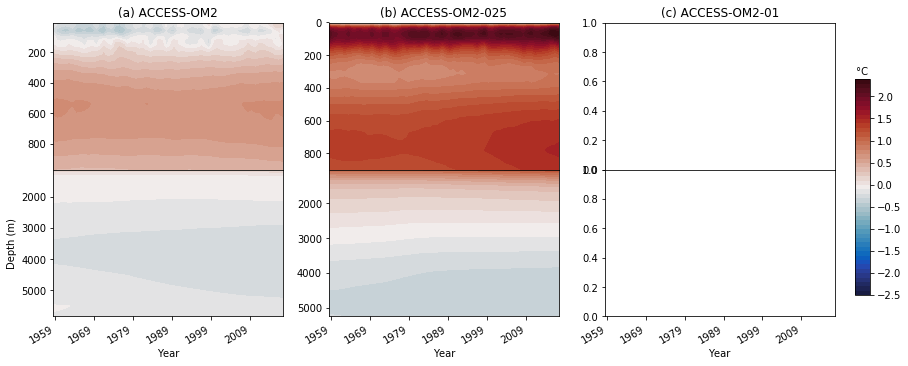

In [6]:
fig,ax = plt.subplots(2,3,sharex=True,figsize=(14,6))
plt.subplots_adjust(hspace=0)
levs = np.arange(-2.5,2.5,0.1)

# 1deg
t_up = temp_hov_1deg.sel(st_ocean=slice(0,1000))
t_lo = temp_hov_1deg.sel(st_ocean=slice(1000,6000))

axx=ax[0,0]
t_up.T.plot.contourf(ax=axx,levels=levs,cmap = cm.cm.balance,yincrease=False,add_colorbar=False)
axx.set_ylabel('')
axx.set_title('(a) ACCESS-OM2')
axx=ax[1,0]
p1=t_lo.T.plot.contourf(ax=axx,levels=levs,cmap = cm.cm.balance,yincrease=False,add_colorbar=False)
axx.set_ylabel('Depth (m)')
axx.set_xlabel('Year')

# 025deg
t_up = temp_hov_025deg.sel(st_ocean=slice(0,1000))
t_lo = temp_hov_025deg.sel(st_ocean=slice(1000,6000))

axx=ax[0,1]
t_up.T.plot.contourf(ax=axx,levels=levs,cmap = cm.cm.balance,yincrease=False,add_colorbar=False)
axx.set_ylabel('')
axx.set_xlabel('')
axx.set_title('(b) ACCESS-OM2-025')
axx=ax[1,1]
p1=t_lo.T.plot.contourf(ax=axx,levels=levs,cmap = cm.cm.balance,yincrease=False,add_colorbar=False)
axx.set_ylabel('')
axx.set_xlabel('Year')

# 01deg
#t_up = temp_hov_01deg.sel(st_ocean=slice(0,1000))
#t_lo = temp_hov_01deg.sel(st_ocean=slice(1000,6000))

axx=ax[0,2]
#t_up.T.plot.contourf(ax=axx,levels=levs,cmap = cm.cm.balance,yincrease=False,add_colorbar=False)
axx.set_ylabel('')
axx.set_xlabel('')
#plt.xlim([pd.datetime(1958,1,1),pd.datetime(2017,12,31)])
axx.set_title('(c) ACCESS-OM2-01')
axx=ax[1,2]
#p1=t_lo.T.plot.contourf(ax=axx,levels=levs,cmap = cm.cm.balance,yincrease=False,add_colorbar=False)
axx.set_ylabel('')
axx.set_xlabel('Year')
#plt.xlim([pd.datetime(1958,1,1),pd.datetime(2017,12,31)])

ax1 = plt.axes([0.92,0.25,0.015,0.5])
cb = plt.colorbar(p1,cax=ax1,orientation='vertical')
ax1.xaxis.set_label_position("top")
cb.ax.set_xlabel('°C')

savefigure('tz_hovmoller')